In [1]:
import sys
import os
import warnings

os.chdir("../")

os.getcwd()

'/Users/sanyao1/Library/CloudStorage/OneDrive-LouisianaStateUniversity(2)/lsu spring-25/CHE 4230/homeworks/Assignment 4/meter_Hw4'

In [2]:
from src.data_preprocess import DataPreprocessing

In [3]:
preprocessor = DataPreprocessing()

data = preprocessor.load_data("data/Meter_A.txt")

         0         1         2         3          4          5         6   \
0  0.841499  1.009367  0.993816  8.469805  10.278727  10.037759  8.501365   
1  0.842250  1.006584  0.996605  7.531891   9.139924   8.951618  7.612213   
2  0.840723  1.011647  0.998152  6.641699   7.975464   7.857692  6.593117   
3  0.841119  1.017807  0.996812  5.687524   6.824334   6.689885  5.615428   
4  0.840358  1.016534  0.996221  5.660385   6.829560   6.675628  5.623977   

         7          8          9   ...         27         28         29  \
0  8.581726  10.247763  10.058822  ...  32.451173  34.568685  33.082683   
1  7.623325   9.106345   8.945142  ...  32.428385  34.441732  33.081055   
2  6.681572   7.964596   7.814698  ...  32.428385  34.275715  33.113605   
3  5.763315   6.801051   6.686639  ...  32.485350  34.080403  33.170573   
4  5.736818   6.813453   6.672377  ...  32.503255  34.122720  33.164062   

          30         31         32         33         34         35  36  
0  36.722005

In [4]:
type(data)

numpy.ndarray

## Data Preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Split the dataset into training/validation and test sets
train_validation, test = train_test_split(data, test_size = 0.2, random_state=12)

# Split the remaining into traning and validation sets
train, validation = train_test_split(train_validation, test_size = 0.2, random_state=99)

In [7]:
# Isolate the features and target variable of training dataset
X_train = train[:, :-1]
y_train = train[:, -1]

# Ensure all duplicates are removed
#set(y_train)

In [8]:
# Isolate the features and target variable of test dataset
X_test = test[:, :-1]
y_test = test[:, -1]        


In [9]:
# Standardize the features of training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train ANN model

In [10]:
# Import MLPRegressor from sklearn neural network
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

/opt/anaconda3/envs/che4230/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/che4230/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/che4230/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/che4230/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

Optimized ANN Regression - MSE: 0.0452, R² Score: 0.8192
Best Parameters: {'hidden_layer_sizes': (100, 50, 25, 10), 'learning_rate_init': 0.001, 'max_iter': 500}


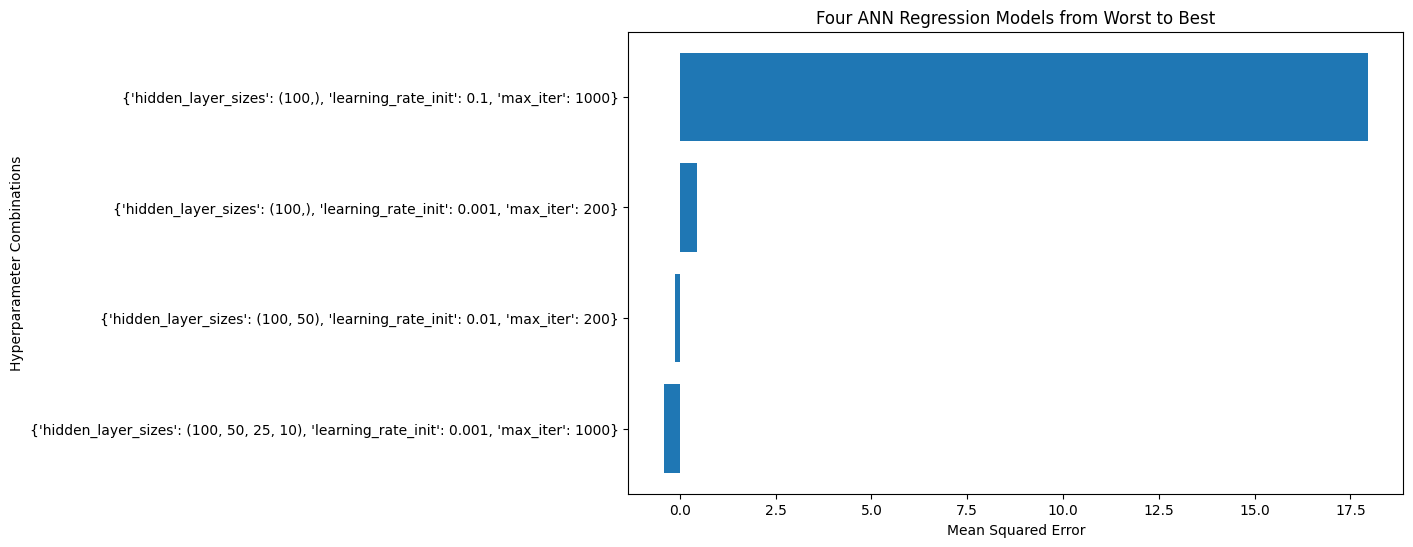

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 100), (100, 50), (100, 50, 25, 10)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 500, 1000]
}

# Initialize the MLPRegressor
mlp = MLPRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_mlp = grid_search.best_estimator_

# Fit the best estimator on the training data
best_mlp.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_best_mlp = best_mlp.predict(X_test_scaled)

# Calculate the MSE and R² score
mse_best_mlp = mean_squared_error(y_test, y_pred_best_mlp)
r2_best_mlp = r2_score(y_test, y_pred_best_mlp)

print(f"Optimized ANN Regression - MSE: {mse_best_mlp:.4f}, R² Score: {r2_best_mlp:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

# Extract four models from worst to best
results = grid_search.cv_results_
sorted_indices = np.argsort(results['mean_test_score'])
four_indices = [sorted_indices[0], sorted_indices[len(sorted_indices)//3], sorted_indices[2*len(sorted_indices)//3], sorted_indices[-1]]

mse_values = -results['mean_test_score'][four_indices]
param_labels = [str(results['params'][i]) for i in four_indices]

plt.figure(figsize=(10,6))
plt.barh(param_labels, mse_values)
plt.xlabel("Mean Squared Error")
plt.ylabel("Hyperparameter Combinations")
plt.title("Four ANN Regression Models from Worst to Best")
plt.gca().invert_yaxis()
plt.show()

In the excercise above, i used the gridsearch to find the best combination of hyperparameters that minimizes the MSE value and optimizes the R2 score. In the above plot, the combination of hidden layer sizes: (100, 50), learning rate init of 0.01 and max iter of 200 initially yielded a good MSE value, however, the R2 score was still low. To improve this, i increased the number of hidden layers to four - (100, 50, 25, 10). This together 'learning_rate_init': 0.001, and 'max_iter': 500 increased the R2 score to an acceptable level. 